# VISUALIZACION DE LOS DATOS

11501568/11490434 [==============================] - 0s 0us/step
Shape of x_train:  (60000, 28, 28)
Training images:  60000
Test images:  10000
Image height:  28
Image width:  28
-----------------------------


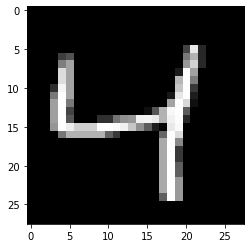

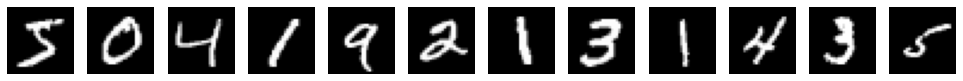

In [ ]:
# Importamos librerias necesarias
import numpy as np
import pandas as pd

from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_train_images = x_train.shape[0]
num_test_images = x_test.shape[0]
image_height = x_train.shape[1]
image_width = x_train.shape[2]

print("Shape of x_train: ", x_train.shape)
print("Training images: ", num_train_images)
print("Test images: ", num_test_images)
print("Image height: ", image_height)
print("Image width: ", image_width)
print("-----------------------------")

plt.imshow(x_train[2], cmap='gray')

fig, ax = plt.subplots(1, 12, figsize=(17, 6))
for i in range(12):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].axis('off')

# DATA CLEANING

In [ ]:
from keras.utils import np_utils

#Las redes neuronales funcionan con float32, al ser un dataset pequeÃ±o ya lo podemos hacer
x_train = x_train.reshape(num_train_images, image_height*image_width).astype('float32')
x_test = x_test.reshape(num_test_images, image_height*image_width).astype('float32')

In [ ]:
print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("-----------------------------")
print("y_train sample: ", y_train[:12])
print("-----------------------------")

X_train shape:  (60000, 784)
X_test shape:  (10000, 784)
y_train shape:  (60000,)
y_test shape:  (10000,)
-----------------------------
y_train sample:  [5 0 4 1 9 2 1 3 1 4 3 5]
-----------------------------


In [ ]:
#normalizamos los valores entre 0 y 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
#Hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("-----------------------------")
print("y_train sample: ", y_train[0])

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)
-----------------------------
y_train sample:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#Numero de clases en el hot
num_classes = y_test.shape[1]
print("Number of classes: ", num_classes)

Number of classes:  10


# CREACION DEL MODELO

In [ ]:
#Creamos la red
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# Dense->todas las neuronas estan conectadas con las de la siguiente capa
# El primer parametro indica el numero de neuronas de la capa
model.add(Dense(500, input_dim=image_height*image_width, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
# loss-> funcion de error;  optimizer-> algorithm for gradient descent;  metrics-> funcion para medir la precision
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#batch_size 
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=7, batch_size=512, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
118/118 - 8s - loss: 0.4156 - accuracy: 0.8873 - val_loss: 0.2092 - val_accuracy: 0.9418 - 8s/epoch - 66ms/step
Epoch 2/7
118/118 - 4s - loss: 0.1768 - accuracy: 0.9494 - val_loss: 0.1514 - val_accuracy: 0.9563 - 4s/epoch - 35ms/step
Epoch 3/7
118/118 - 2s - loss: 0.1256 - accuracy: 0.9647 - val_loss: 0.1155 - val_accuracy: 0.9668 - 2s/epoch - 21ms/step
Epoch 4/7
118/118 - 2s - loss: 0.0961 - accuracy: 0.9725 - val_loss: 0.1028 - va

# VISUALIZACION DE LOS RESULTADOS

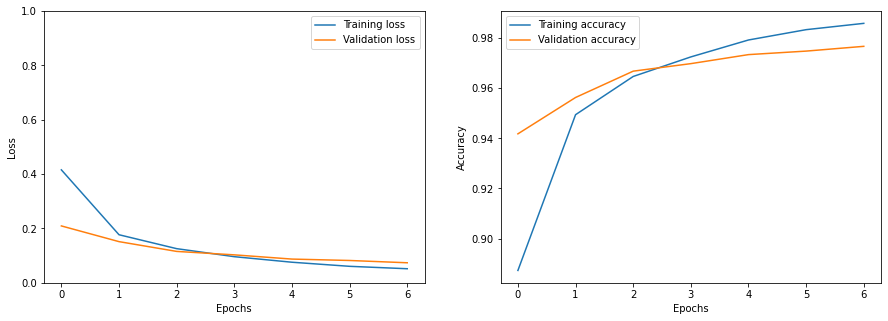

In [ ]:
def plot(history):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].plot(history.history['loss'], label='Training loss')
    ax[0].plot(history.history['val_loss'], label='Validation loss')
    ax[0].legend()

    ax[1].plot(history.history['accuracy'], label='Training accuracy')
    ax[1].plot(history.history['val_accuracy'], label='Validation accuracy')
    ax[1].legend()
    
    ax[0].set_xlabel('Epochs')
    ax[1].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    
    # Para visualizar mejor el loss respecto al cero
    ax[0].set_ylim(0, 1)
    
    
plot(history)

In [ ]:
print(model.predict(x_test[0].reshape(1, 28*28, 1)))
print(y_test[0])

[[3.0698011e-06 1.0339199e-07 3.6864218e-04 4.7637263e-04 2.1266464e-08
  1.9142183e-06 7.2144485e-10 9.9908435e-01 1.8771771e-05 4.6748275e-05]]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
